In [1]:
from pyparsing import Word, hexnums, WordEnd, Optional, alphas, alphanums
import numpy as np
import pandas as pd
import os

In [2]:
path="Data/Experiment 3/Train"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [3]:
files =[]
for i in range(17):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        files.append(file)

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'cmp', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cmp', 'cli', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'call', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'cmp', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'cmp', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'call', 'call', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'cmp', 'int', 'mov

In [4]:
unique_op={}
for file in files:
    for opcode in file:
        if opcode not in unique_op:
            unique_op[opcode]=1
        else:
            unique_op[opcode]+=1
unique_op

{'mov': 3485,
 'cmp': 419,
 'int': 646,
 'db': 34,
 'push': 153,
 'call': 642,
 'jz': 119,
 'pop': 153,
 'cli': 17,
 'sti': 17,
 'jmp': 51,
 'xor': 389,
 'jnz': 153,
 'inc': 136,
 'ret': 289,
 'jc': 34,
 'dec': 85,
 'stosb': 68,
 'mul': 68,
 'add': 357,
 'or': 85,
 'stc': 51,
 'test': 17,
 'je': 17,
 'cld': 17,
 'lodsb': 17,
 'jnc': 85,
 'sub': 85,
 'clc': 17,
 'and': 68,
 'adc': 119,
 'shr': 51,
 'shl': 34}

In [5]:
def pair(x, y):
    i,j = 0,0
    m,n = len(x),len(y)
    dp = np.zeros([m+1,n+1], dtype=int)
    pxy = 3
    pgap = 2
 
    dp[0:(m+1),0] = [ i * pgap for i in range(m+1)]
    dp[0,0:(n+1)] = [ i * pgap for i in range(n+1)]
    
    for i in range(1,m+1):
        for j in range(1,n+1):
            dp[i][j] = dp[i-1][j-1] if x[i-1]==y[j-1] else min(dp[i - 1][j - 1] + pxy, dp[i - 1][j] + pgap, dp[i][j - 1] + pgap)
     
    l,i,j = n + m, m, n  
    p,q =l,l 
    a,b=[0]*(l+1), [0]*(l+1)
 
    while not (i == 0 or j == 0):
        if x[i - 1] == y[j - 1]:       
            a[p] = x[i - 1]
            b[q] = y[j - 1]
            i -= 1
            j -= 1
        elif (dp[i - 1][j - 1] + pxy) == dp[i][j]:
            a[p] = x[i - 1]
            b[q] = y[j - 1]
            i -= 1
            j -= 1
        elif (dp[i - 1][j] + pgap) == dp[i][j]:
            a[p] = x[i - 1]
            b[q] = '-'
            i -= 1
        elif (dp[i][j - 1] + pgap) == dp[i][j]:       
            a[p] = '-'
            b[q] = y[j - 1]
            j -= 1
        p -= 1
        q -= 1
 
    for p in range(p,0,-1):
        if i > 0:
            i -= 1
            a[p] = x[i]
        else:
            a[p] = '-'
            
    for q in range(q,0,-1):
        if j > 0:
            j -= 1
            b[q] = y[j]
        else:
            b[q] = '-'
 
    id = 1
    for i in range(l,0,-1):
        if b[i] == '-' and a[i] == '-':
            id = i + 1
            break
    return [dp[m][n], a[id:],b[id:]]

In [6]:
l=17
pairs=[[] for _ in range(l+1)]
score=[[0]*(l+1) for _ in range(l+1)]
for i in range(l):
    for j in range(l):
        if i!=j:
            s,s1,s2= pair(files[i],files[j])
            print(i,j,s)
            score[i][j]=s
            pairs[i].append([s1,s2])

0 1 48
0 2 52
0 3 58
0 4 108
0 5 72
0 6 72
0 7 72
0 8 138
0 9 94
0 10 162
0 11 98
0 12 134
0 13 144
0 14 96
0 15 132
0 16 136
1 0 48
1 2 4
1 3 10
1 4 64
1 5 24
1 6 28
1 7 24
1 8 94
1 9 62
1 10 134
1 11 66
1 12 90
1 13 100
1 14 64
1 15 100
1 16 104
2 0 52
2 1 4
2 3 6
2 4 68
2 5 28
2 6 32
2 7 28
2 8 98
2 9 66
2 10 138
2 11 70
2 12 94
2 13 104
2 14 68
2 15 104
2 16 108
3 0 58
3 1 10
3 2 6
3 4 70
3 5 26
3 6 30
3 7 30
3 8 100
3 9 68
3 10 144
3 11 76
3 12 100
3 13 106
3 14 70
3 15 110
3 16 114
4 0 108
4 1 64
4 2 68
4 3 70
4 5 64
4 6 68
4 7 60
4 8 30
4 9 126
4 10 94
4 11 122
4 12 42
4 13 36
4 14 120
4 15 160
4 16 164
5 0 72
5 1 24
5 2 28
5 3 26
5 4 64
5 6 4
5 7 16
5 8 86
5 9 70
5 10 158
5 11 90
5 12 102
5 13 92
5 14 84
5 15 124
5 16 128
6 0 72
6 1 28
6 2 32
6 3 30
6 4 68
6 5 4
6 7 20
6 8 90
6 9 74
6 10 162
6 11 94
6 12 106
6 13 96
6 14 88
6 15 128
6 16 132
7 0 72
7 1 24
7 2 28
7 3 30
7 4 60
7 5 16
7 6 20
7 8 78
7 9 82
7 10 150
7 11 82
7 12 98
7 13 76
7 14 80
7 15 116
7 16 120
8 0 138
8 1 94
8

In [7]:
s=pd.DataFrame(score)
s

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0     0   48   52   58  108   72   72   72  138   94  162   98  134  144   96   
1    48    0    4   10   64   24   28   24   94   62  134   66   90  100   64   
2    52    4    0    6   68   28   32   28   98   66  138   70   94  104   68   
3    58   10    6    0   70   26   30   30  100   68  144   76  100  106   70   
4   108   64   68   70    0   64   68   60   30  126   94  122   42   36  120   
5    72   24   28   26   64    0    4   16   86   70  158   90  102   92   84   
6    72   28   32   30   68    4    0   20   90   74  162   94  106   96   88   
7    72   24   28   30   60   16   20    0   78   82  150   82   98   76   80   
8   138   94   98  100   30   86   90   78    0  156   76  152   20    6  150   
9    94   62   66   68  126   70   74   82  156    0   88   20  143  158   14   
10  162  134  138  144   94  158  162  150   76   88    0   76   63   78   78   
11   98   66   70   76  122   90   94   82  152   20   76    0  139  154    6   
12  134   90   94  100   42  102  106   98   20  143   63  139    0   22  137   
13  144  100  104  106   36   92   96   76    6  158   78  154   22    0  152   
14   96   64   68   70  120   84   88   80  150   14   78    6  137  152    0   
15  132  100  104  110  160  124  128  116  190   54  114   46  173  188   48   
16  136  104  108  114  164  128  132  120  194   58  118   50  177  192   52   
17    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     15   16  17  
0   132  136   0  
1   100  104   0  
2   104  108   0  
3   110  114   0  
4   160  164   0  
5   124  128   0  
6   128  132   0  
7   116  120   0  
8   190  194   0  
9    54   58   0  
10  114  118   0  
11   46   50   0  
12  173  177   0  
13  188  192   0  
14   48   52   0  
15    0    4   0  
16    4    0   0  
17    0    0   0

In [8]:
def findMaxVertex(visited, weights):
    index = -1
    maxW = -float('inf')
    for i in range(V):
        if (visited[i] == False and weights[i] > maxW):
            maxW = weights[i]
            index = i;
    return index;
 
def printMaximumSpanningTree(graph, parent):
    MST = 0;
    scores=[]
    for i in range(1, V):
        MST += graph[i][parent[i]] 
        scores.append(graph[i][parent[i]])
 
    print("Weight of the maximum Spanning-tree ", MST) 
    print() 
    print("Edges \tWeight") 
    
    for i in range(1, V):
        print(parent[i] , " - " , i , " \t" , graph[i][parent[i]]) 
    return parent,scores

def maximumSpanningTree(graph):
    visited = [True]*V 
    weights = [0]*V 
    parent = [0]*V 
 
    for i in range(V):
        visited[i] = False 
        weights[i] = -float('inf') 
 
    weights[0] = float('inf')
    parent[0] = -1 
 
    for i in range(V - 1):
        maxVertexIndex = findMaxVertex(visited, weights) 
        visited[maxVertexIndex] = True 
        for j in range(V):
            if (graph[j][maxVertexIndex] != 0 and visited[j] == False):
                if (graph[j][maxVertexIndex] > weights[j]):
                    weights[j] = graph[j][maxVertexIndex] 
                    parent[j] = maxVertexIndex 
    return printMaximumSpanningTree(graph, parent)
    
V=l
edges,scores=maximumSpanningTree(score)

Weight of the maximum Spanning-tree  2573

Edges 	Weight
10  -  1  	 134
10  -  2  	 138
10  -  3  	 144
16  -  4  	 164
10  -  5  	 158
10  -  6  	 162
10  -  7  	 150
16  -  8  	 194
13  -  9  	 158
0  -  10  	 162
13  -  11  	 154
16  -  12  	 177
0  -  13  	 144
13  -  14  	 152
8  -  15  	 190
13  -  16  	 192


In [9]:
scoreP=[]
for i in range(1,len(scores)):
    scoreP.append([scores[i],edges[i],i])
scoreP.sort(reverse=True)
scoreP

[[194, 10, 7],
 [192, 8, 15],
 [190, 13, 14],
 [177, 13, 11],
 [164, 10, 3],
 [162, 13, 9],
 [162, 10, 5],
 [158, 16, 8],
 [158, 16, 4],
 [154, 0, 10],
 [152, 0, 13],
 [150, 10, 6],
 [144, 16, 12],
 [144, 10, 2],
 [138, 10, 1]]

In [10]:
msa=[]
ind=[]
for i in scoreP:
    if i[1]not in ind:
        msa.append(pairs[i[1]][i[2]][0])
        ind.append(i[1])
    if i[2] not in ind:
        msa.append(pairs[i[1]][i[2]][1])
        ind.append(i[2])
len(msa)

17

In [11]:
opD={}
opD['-']='-'
j='A'
for i in unique_op:
    opD[i]=j
    if j=='Z':
        j='a'
    else:
        j=chr(ord(j) + 1)
opD

{'-': '-',
 'mov': 'A',
 'cmp': 'B',
 'int': 'C',
 'db': 'D',
 'push': 'E',
 'call': 'F',
 'jz': 'G',
 'pop': 'H',
 'cli': 'I',
 'sti': 'J',
 'jmp': 'K',
 'xor': 'L',
 'jnz': 'M',
 'inc': 'N',
 'ret': 'O',
 'jc': 'P',
 'dec': 'Q',
 'stosb': 'R',
 'mul': 'S',
 'add': 'T',
 'or': 'U',
 'stc': 'V',
 'test': 'W',
 'je': 'X',
 'cld': 'Y',
 'lodsb': 'Z',
 'jnc': 'a',
 'sub': 'b',
 'clc': 'c',
 'and': 'd',
 'adc': 'e',
 'shr': 'f',
 'shl': 'g'}

In [13]:
for i in range(len(msa)):
    for j in range(len(msa[i])):
        msa[i][j]=opD[msa[i][j]]
msa[0]      

['A',
 'A',
 'A',
 '-',
 '-',
 'A',
 'C',
 'A',
 'A',
 'C',
 'D',
 'E',
 'A',
 'A',
 'A',
 'A',
 'F',
 'G',
 'F',
 'F',
 'F',
 'G',
 '-',
 '-',
 'F',
 'F',
 'F',
 'H',
 'A',
 '-',
 'I',
 'A',
 '-',
 'A',
 'B',
 'A',
 'A',
 '-',
 '-',
 'J',
 'F',
 'K',
 'A',
 'A',
 'A',
 'L',
 'A',
 'C',
 'B',
 'G',
 'L',
 '-',
 '-',
 'A',
 'A',
 'F',
 'M',
 'L',
 'A',
 '-',
 'N',
 'A',
 'F',
 'O',
 'F',
 'P',
 'B',
 'M',
 'Q',
 'A',
 'A',
 'F',
 'N',
 'E',
 'F',
 'G',
 'H',
 'L',
 'R',
 'A',
 'A',
 'A',
 'A',
 'S',
 'T',
 'A',
 'F',
 'E',
 'F',
 'M',
 'F',
 'M',
 'N',
 'H',
 'L',
 'F',
 'R',
 'U',
 'O',
 'F',
 'O',
 'F',
 'A',
 'A',
 'C',
 'A',
 'B',
 'A',
 'F',
 'E',
 'A',
 'B',
 'A',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'A',
 '-',
 'C',
 'U',
 'G',
 'H',
 'N',
 'R',
 'A',
 'A',
 '-',
 'F',
 'Q',
 'E',
 'F',
 'P',
 'A',
 'C',
 'K',
 'H',
 'A',
 'V',
 '-',
 '-',
 'O',
 'H',
 'O',
 'F',
 'E',
 'A',
 '-',
 'C',
 'A',
 'A',
 'A',
 '-',
 'C',
 'H',
 'U',
 'G',
 'W'

In [14]:
for i in msa:
    print(''.join(i))

AAA--ACAACDEAAAAFGFFFG--FFFHA-IA-ABAA--JFKAAALACBGL--AAFMLA-NAFOFPBMQAAFNEFGHLRAAAASTAFEFMFMNHLFRUOFOFAACABAFEABALLLLLLLLLLLLLA-CUGHNRAA-FQEFPACKHAV--OHOFEA-CAAA-CHUGWMBXFEACACKLOAASTOANUMQEYZRUMHOFaFaFa-FAABBMVObOFAACaAAAAACATTbTTbBFATASAAAACAAAACaABcGVFAdMAbATeAACAAAACFALAACAAANTAeAACAAAACAAANTAeAACAAAACAAATTAeAACAAAACLLAACAAfAdAgTbAATAfTAAAAAAAATLeTeEAfAgTAHdAATAAAAC--------------AQQASTAeAAAACLLLLLLLLLLAANAABAATAAAABAACOFFFLCdOAAFOACAABAAAAACOAAAACAAFFOAAACAAAAACAAACABALACAAAAAA--OFAAAAACAACALAA-ACOD
AAABBACAACDEAAAAFGFFFGFFFFFHABIABA-AABBJFKAAALACBGLFFAAFMLABNAFOFPBMQAAFNEFGHLRAAAASTAFEFMFMNHL-RUOFO-AACA-AFEA-A-------------AFCUGHNRAABFQEFPACKHAVFFOHOFEABCAAAFCHUGWMBXFEACACKLOAASTOANUMQEYZRUMHOFaFaFaFFAA-BMVObO-AACaAAAAACATTbTTbB-ATASAAAACAAAACaABcGV-AdMAbATeAACAAAACFALAACAAANTAeAACAAAACAAANTAeAACAAAACAAATTAeAACAAAACLLAACAAfAdAgTbAATAfTAAAAAAAATLeTeEAfAgTAHdAATAAAACBBBBBBBBBBBBBBAQQASTAeAAAAC----------AANAA-AATAAAA-AACO---LCdOAA-OACAA-AAAAACOAAAACAA-FOAAACAAAAACAAACABALACAAAAAAFFOFA

In [15]:
df=pd.DataFrame(msa)
df

0   1   2   3   4   5   6   7   8   9    ...   518   519   520   521   522  \
0    A   A   A   -   -   A   C   A   A   C  ...  None  None  None  None  None   
1    A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
2    A   A   A   B   B   A   C   A   A   C  ...     C     A     L     A     A   
3    A   A   A   -   -   A   C   A   A   C  ...     C     A     L     A     A   
4    A   A   A   B   B   A   C   A   A   C  ...     L     A     A     -     A   
5    A   A   A   -   -   A   C   A   A   C  ...     L     A     A     B     A   
6    A   A   A   -   -   A   C   A   A   C  ...  None  None  None  None  None   
7    A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
8    A   A   A   -   -   A   C   A   A   C  ...  None  None  None  None  None   
9    A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
10   A   A   A   -   -   A   C   A   A   C  ...     C     A     L     A     A   
11   A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
12   A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
13   A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
14   A   A   A   B   B   A   C   A   A   C  ...     C     O     D  None  None   
15   A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   
16   A   A   A   B   B   A   C   A   A   C  ...  None  None  None  None  None   

     523   524   525   526   527  
0   None  None  None  None  None  
1   None  None  None  None  None  
2      -     A     C     O     D  
3      B     A     C     O     D  
4      C     O     D  None  None  
5      C     O     D  None  None  
6   None  None  None  None  None  
7   None  None  None  None  None  
8   None  None  None  None  None  
9   None  None  None  None  None  
10     B     A     C     O     D  
11  None  None  None  None  None  
12  None  None  None  None  None  
13  None  None  None  None  None  
14  None  None  None  None  None  
15  None  None  None  None  None  
16  None  None  None  None  None  

[17 rows x 528 columns]

In [16]:
df.fillna('-',inplace=True)
df

0   1   2   3   4   5   6   7   8   9    ... 518 519 520 521 522 523 524  \
0    A   A   A   -   -   A   C   A   A   C  ...   -   -   -   -   -   -   -   
1    A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
2    A   A   A   B   B   A   C   A   A   C  ...   C   A   L   A   A   -   A   
3    A   A   A   -   -   A   C   A   A   C  ...   C   A   L   A   A   B   A   
4    A   A   A   B   B   A   C   A   A   C  ...   L   A   A   -   A   C   O   
5    A   A   A   -   -   A   C   A   A   C  ...   L   A   A   B   A   C   O   
6    A   A   A   -   -   A   C   A   A   C  ...   -   -   -   -   -   -   -   
7    A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
8    A   A   A   -   -   A   C   A   A   C  ...   -   -   -   -   -   -   -   
9    A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
10   A   A   A   -   -   A   C   A   A   C  ...   C   A   L   A   A   B   A   
11   A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
12   A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
13   A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
14   A   A   A   B   B   A   C   A   A   C  ...   C   O   D   -   -   -   -   
15   A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   
16   A   A   A   B   B   A   C   A   A   C  ...   -   -   -   -   -   -   -   

   525 526 527  
0    -   -   -  
1    -   -   -  
2    C   O   D  
3    C   O   D  
4    D   -   -  
5    D   -   -  
6    -   -   -  
7    -   -   -  
8    -   -   -  
9    -   -   -  
10   C   O   D  
11   -   -   -  
12   -   -   -  
13   -   -   -  
14   -   -   -  
15   -   -   -  
16   -   -   -  

[17 rows x 528 columns]

In [17]:
ip=df.values.tolist()
ip

[['A',
  'A',
  'A',
  '-',
  '-',
  'A',
  'C',
  'A',
  'A',
  'C',
  'D',
  'E',
  'A',
  'A',
  'A',
  'A',
  'F',
  'G',
  'F',
  'F',
  'F',
  'G',
  '-',
  '-',
  'F',
  'F',
  'F',
  'H',
  'A',
  '-',
  'I',
  'A',
  '-',
  'A',
  'B',
  'A',
  'A',
  '-',
  '-',
  'J',
  'F',
  'K',
  'A',
  'A',
  'A',
  'L',
  'A',
  'C',
  'B',
  'G',
  'L',
  '-',
  '-',
  'A',
  'A',
  'F',
  'M',
  'L',
  'A',
  '-',
  'N',
  'A',
  'F',
  'O',
  'F',
  'P',
  'B',
  'M',
  'Q',
  'A',
  'A',
  'F',
  'N',
  'E',
  'F',
  'G',
  'H',
  'L',
  'R',
  'A',
  'A',
  'A',
  'A',
  'S',
  'T',
  'A',
  'F',
  'E',
  'F',
  'M',
  'F',
  'M',
  'N',
  'H',
  'L',
  'F',
  'R',
  'U',
  'O',
  'F',
  'O',
  'F',
  'A',
  'A',
  'C',
  'A',
  'B',
  'A',
  'F',
  'E',
  'A',
  'B',
  'A',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'L',
  'A',
  '-',
  'C',
  'U',
  'G',
  'H',
  'N',
  'R',
  'A',
  'A',
  '-',
  'F',
  'Q',
  'E',
  'F',
  'P',
  'A',

In [18]:
mpd= pd.DataFrame(ip)
mpd.T

0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
0    A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A
1    A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A
2    A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A  A
3    -  B  B  -  B  -  -  B  -  B  -  B  B  B  B  B  B
4    -  B  B  -  B  -  -  B  -  B  -  B  B  B  B  B  B
..  .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
523  -  -  -  B  C  C  -  -  -  -  B  -  -  -  -  -  -
524  -  -  A  A  O  O  -  -  -  -  A  -  -  -  -  -  -
525  -  -  C  C  D  D  -  -  -  -  C  -  -  -  -  -  -
526  -  -  O  O  -  -  -  -  -  -  O  -  -  -  -  -  -
527  -  -  D  D  -  -  -  -  -  -  D  -  -  -  -  -  -

[528 rows x 17 columns]

In [19]:
m=mpd.T.values.tolist()
m

[['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A'],
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A'],
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A'],
 ['-',
  'B',
  'B',
  '-',
  'B',
  '-',
  '-',
  'B',
  '-',
  'B',
  '-',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B'],
 ['-',
  'B',
  'B',
  '-',
  'B',
  '-',
  '-',
  'B',
  '-',
  'B',
  '-',
  'B',
  'B',
  'B',
  'B',
  'B',
  'B'],
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A'],
 ['C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C'],
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A'],
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A'

In [20]:
gc=[0]*len(m)
for i in range(len(m)):
    for j in m[i]:
        if j=='-':
            gc[i]+=1
gc

[0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 4,
 2,
 3,
 0,
 7,
 4,
 0,
 7,
 5,
 4,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 3,
 2,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 4,
 1,
 6,
 4,
 4,
 4,
 4,
 5,
 5,
 8,
 9,
 9,
 10,
 11,
 10,
 8,
 8,
 7,
 8,
 7,
 8,
 8,
 4,
 5,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 3,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 

In [21]:
match_st=[]
insert_st=[]
for i in range(len(m)):
    if gc[i]<len(msa)/2:
        match_st.append(i)
    else:
        insert_st.append(i)
match_st,insert_st

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  16

In [22]:
df.style.set_properties(**{'background-color': '#BABD42'}, subset=match_st[:-1])

In [23]:
i=0
s=0
ins=[]
while i+1<len(insert_st):
    if insert_st[i+1]!=insert_st[i]+1:
        ins.append([insert_st[s],insert_st[i]])
        s=i+1
    i+=1
ins.append([insert_st[s],insert_st[i]])
ins

[[114, 118], [399, 402], [510, 527]]

In [24]:
lastI=len(ins) 
if len(m)-1 not in insert_st:
                    lastI+=1
if 0 not in insert_st:
                    lastI+=1
lastI

4

In [25]:
inserts=[i for i in range(lastI+1)]
inserts

[0, 1, 2, 3, 4]

In [26]:
from collections import defaultdict
transProb= defaultdict(lambda:defaultdict(lambda:0))
if 0 in match_st:
    transProb['S']['M0']=sum([1 for i in m[0] if i!='-'])
    transProb['S']['D0']=sum([1 for i in m[0] if i=='-'])
    transProb['S']['I0']=0
else:
    nextM = match_st[0]
    allgaps = sum([1 for x in  map(list, zip(*m[0:nextM])) if sum([1 for j in x if j=='-'])==len(x)])
    m2m = allgaps - sum([1 for x in m[nextM] if x=='-'])
    m2d = allgaps -m2m
    m2i = len(m[0])-allgaps
    transProb['M'+str(i)]['M'+str(nextM)]=m2m 
    transProb['M'+str(i)]['I0']=m2i
    transProb['M'+str(i)]['D'+str(nextM)]=m2d  
for i in range(len(m)):
    if i in match_st:
        nextI = ins.index([j for j in ins if j[0]>i][0])
        if 0 != ins[0][0]:
            nextI+=1
        if i+1 in match_st:
            transProb['M'+str(i)]['M'+str(i+1)]=sum([1 for i,j in zip(m[i],m[i+1])if j!='-' and i!='-'])
            transProb['M'+str(i)]['I'+str(nextI)]=0
            transProb['M'+str(i)]['D'+str(i+1)]=sum([1 for i,j in zip(m[i],m[i+1]) if j=='-'])
        elif match_st.index(i)+1 <len(match_st):
                nextM = match_st[match_st.index(i)+1]
                allgaps = sum([1 for x in  map(list, zip(*m[i+1:nextM])) if sum([1 for j in x if j=='-'])==len(x)])
                m2m = allgaps - sum([1 for x in m[nextM] if x=='-'])
                m2d = allgaps -m2m
                m2i = len(m[0])-allgaps
                transProb['M'+str(i)]['M'+str(nextM)]=m2m 
                transProb['M'+str(i)]['I'+str(nextI)]=m2i
                transProb['M'+str(i)]['D'+str(nextM)]=m2d 
        else:
            if i+1==len(m):
                transProb['M'+str(i)]['E']=len([1 for j in m[i] if j!='-'])
                transProb['M'+str(i)]['I'+str(lastI-1)]=0
            else:
                allgaps = sum([1 for x in  map(list, zip(*m[i+1:])) if sum([1 for j in x if j=='-'])==len(x)])
                transProb['M'+str(i)]['E']=allgaps 
                transProb['M'+str(i)]['I'+str(lastI-1)]=len(m[0])-allgaps  
transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 17, 'D0': 0, 'I0': 0}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 17, 'I1': 0, 'D1': 0}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 17, 'I1': 0, 'D2': 0}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 11, 'I1': 0, 'D3': 6}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 11, 'I1': 0, 'D4': 6}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 11, 'I1': 0, 'D5': 0}),
             'M5': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M6': 17, 'I1': 0, 'D6': 0})

In [27]:
for p,insGrp in enumerate(ins):
    start,end=insGrp[0],insGrp[1]
    mT=list(map(list, zip(*m[start:end+1])))
    if ins[0][0]!=0:
        pos=p+1
    else:
        pos=p
    if end+1<len(m):
        transProb['I'+str(pos)]['M'+str(end+1)]=len(set([i for i,row in enumerate(mT) for j in row if j!='-' and m[end+1][i]!='-']))
        transProb['I'+str(pos)]['D'+str(end+1)]=sum([1 for i in range(len(m[end])) if m[end][i]!='-' and m[end+1][i]=='-'])
    else:
        transProb['I'+str(pos)]['E']=len(set([i for i,row in enumerate(mT) for j in row if j!='-']))
    transProb['I'+str(pos)]['I'+str(pos)]=sum([1 for i in mT for j in range(len(i)) if j+1<len(i) and i[j]!='-' and i[j+1]!='-'])

transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 17, 'D0': 0, 'I0': 0}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 17, 'I1': 0, 'D1': 0}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 17, 'I1': 0, 'D2': 0}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 11, 'I1': 0, 'D3': 6}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 11, 'I1': 0, 'D4': 6}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 11, 'I1': 0, 'D5': 0}),
             'M5': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M6': 17, 'I1': 0, 'D6': 0})

In [28]:
for i in range(len(m)):
    try:
        nextI = ins.index([j for j in ins if j[0]>i][0])
        if 0 != ins[0][0]:
                nextI+=1
    except:
        nextI=lastI-1
    if '-' in m[i] and i in match_st:
        d2m=0
        d2d=0
        d2i=0
        if i+1 in match_st:
            for x,y in zip(m[i],m[i+1]):
                if x=='-':
                    if y=='-':
                        d2d+=1
                    else:
                        d2m+=1
            if d2m!=0:
                transProb['D'+str(i)]['M'+str(i+1)]=d2m
            if d2d!=0:
                transProb['D'+str(i)]['D'+str(i+1)]=d2d
            transProb['D'+str(i)]['I'+str(nextI)]=0
        else:
            gaps=[x for x,g in enumerate(m[i]) if g=='-']
            for gap in gaps:
                d2d=d2m=d2i=0
                j=i+1
                while j<len(m):
                    if j in match_st:
                        if m[j][gap]=='-':
                            d2d+=1
                        else:
                            d2m+=1
                        break
                    if m[j][gap]!='-':
                        d2i+=1
                        break
                    j+=1
                if j>=len(m) and d2m==d2d==d2i==0:
                    transProb['D'+str(i)]['E']+=1
                    transProb['D'+str(i)]['I'+str(lastI-1)]+=0
                else:
                    try:
                        nextI = ins.index([x for x in ins if x[0]>j][0])
                        if 0 != ins[0][0]:
                            nextI+=1
                    except:
                        nextI=lastI-1
                    if d2m!=0:
                        transProb['D'+str(i)]['M'+str(j)]+=d2m
                    if d2d!=0:
                        transProb['D'+str(i)]['D'+str(j)]+=d2d
                    transProb['D'+str(i)]['I'+str(nextI)]+=d2i
transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 17, 'D0': 0, 'I0': 0}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 17, 'I1': 0, 'D1': 0}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 17, 'I1': 0, 'D2': 0}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 11, 'I1': 0, 'D3': 6}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 11, 'I1': 0, 'D4': 6}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 11, 'I1': 0, 'D5': 0}),
             'M5': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M6': 17, 'I1': 0, 'D6': 0})

In [29]:
oldL=len(list(transProb))
newL = 0
while oldL!=newL:
    oldL=len(list(transProb))
    for st in list(transProb):
        for s in transProb[st]:
            if s not in transProb:
                if s[0]=='I':
                    transProb[s][s]=0
                    if 'M'+str(int(s[1:])+1) in transProb:
                        transProb[s]['M'+str(int(s[1:])+1)]=0
                    transProb[s]['D'+str(int(s[1:])+1)]=0
                elif s[0]=='D':
                    if 'M'+str(int(s[1:])+1) in transProb:
                        transProb[s]['M'+str(int(s[1:])+1)]=0
                    transProb[s]['D'+str(int(s[1:])+1)]=0
                    try:
                        nextI = ins.index([x for x in ins if x[1]>int(s[1:])][0])
                        if 0 != ins[0][0]:
                            nextI+=1
                    except:
                        nextI=lastI-1
                    transProb[s]['I'+str(nextI)]=0
    newL=len(list(transProb))
transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 17, 'D0': 0, 'I0': 0}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 17, 'I1': 0, 'D1': 0}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 17, 'I1': 0, 'D2': 0}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 11, 'I1': 0, 'D3': 6}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 11, 'I1': 0, 'D4': 6}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 11, 'I1': 0, 'D5': 0}),
             'M5': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M6': 17, 'I1': 0, 'D6': 0})

In [30]:
#Add one
sums={}
for st in transProb:
    sums[st]=0
    for s in transProb[st]:
        transProb[st][s]+=1
        sums[st]+=transProb[st][s]
transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 18, 'D0': 1, 'I0': 1}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 18, 'I1': 1, 'D1': 1}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 18, 'I1': 1, 'D2': 1}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 12, 'I1': 1, 'D3': 7}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 12, 'I1': 1, 'D4': 7}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 12, 'I1': 1, 'D5': 1}),
             'M5': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M6': 18, 'I1': 1, 'D6': 1})

In [31]:
sums

{'S': 20,
 'M0': 20,
 'M1': 20,
 'M2': 20,
 'M3': 20,
 'M4': 14,
 'M5': 20,
 'M6': 20,
 'M7': 20,
 'M8': 20,
 'M9': 20,
 'M10': 20,
 'M11': 20,
 'M12': 20,
 'M13': 20,
 'M14': 20,
 'M15': 20,
 'M16': 20,
 'M17': 20,
 'M18': 20,
 'M19': 20,
 'M20': 20,
 'M21': 20,
 'M22': 20,
 'M23': 14,
 'M24': 20,
 'M25': 20,
 'M26': 20,
 'M27': 20,
 'M28': 20,
 'M29': 14,
 'M30': 16,
 'M31': 18,
 'M32': 17,
 'M33': 20,
 'M34': 13,
 'M35': 16,
 'M36': 20,
 'M37': 17,
 'M38': 15,
 'M39': 17,
 'M40': 19,
 'M41': 19,
 'M42': 17,
 'M43': 19,
 'M44': 17,
 'M45': 19,
 'M46': 19,
 'M47': 20,
 'M48': 20,
 'M49': 20,
 'M50': 20,
 'M51': 20,
 'M52': 17,
 'M53': 20,
 'M54': 19,
 'M55': 18,
 'M56': 20,
 'M57': 20,
 'M58': 20,
 'M59': 17,
 'M60': 20,
 'M61': 19,
 'M62': 18,
 'M63': 20,
 'M64': 20,
 'M65': 20,
 'M66': 20,
 'M67': 20,
 'M68': 20,
 'M69': 20,
 'M70': 20,
 'M71': 20,
 'M72': 20,
 'M73': 20,
 'M74': 20,
 'M75': 20,
 'M76': 20,
 'M77': 20,
 'M78': 20,
 'M79': 20,
 'M80': 20,
 'M81': 20,
 'M82': 20,
 'M8

In [32]:
#Make it probabilities
for st in transProb:
    for s in transProb[st]:
        transProb[st][s]/=sums[st]
transProb

defaultdict(<function __main__.<lambda>()>,
            {'S': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M0': 0.9, 'D0': 0.05, 'I0': 0.05}),
             'M0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M1': 0.9, 'I1': 0.05, 'D1': 0.05}),
             'M1': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M2': 0.9, 'I1': 0.05, 'D2': 0.05}),
             'M2': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M3': 0.6, 'I1': 0.05, 'D3': 0.35}),
             'M3': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M4': 0.6, 'I1': 0.05, 'D4': 0.35}),
             'M4': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'M5': 0.8571428571428571,
                          'I1': 0.07142857142857142,
                          'D5': 0.07142857142857142

In [37]:
import json
with open('transition intruder exp 3 train.txt', 'w') as file:
     file.write(json.dumps(transProb))

In [38]:
emission={}
for i,v in enumerate(ins):
    emission['I'+str(i+1)]={}
    for x in opD:
        emission['I'+str(i+1)][opD[x]]=0
    for j in m[v[0]:v[1]+1]:
        for k in j:
            emission['I'+str(i+1)][k]+=1
for i in match_st:
    emission['M'+str(i)]={}
    for x in opD:
        emission['M'+str(i)][opD[x]]=0
    for j in m[i]:
        emission['M'+str(i)][j]+=1
emission

{'I1': {'-': 49,
  'A': 7,
  'B': 3,
  'C': 1,
  'D': 0,
  'E': 0,
  'F': 0,
  'G': 0,
  'H': 0,
  'I': 0,
  'J': 0,
  'K': 0,
  'L': 25,
  'M': 0,
  'N': 0,
  'O': 0,
  'P': 0,
  'Q': 0,
  'R': 0,
  'S': 0,
  'T': 0,
  'U': 0,
  'V': 0,
  'W': 0,
  'X': 0,
  'Y': 0,
  'Z': 0,
  'a': 0,
  'b': 0,
  'c': 0,
  'd': 0,
  'e': 0,
  'f': 0,
  'g': 0},
 'I2': {'-': 37,
  'A': 10,
  'B': 12,
  'C': 2,
  'D': 0,
  'E': 0,
  'F': 0,
  'G': 0,
  'H': 0,
  'I': 0,
  'J': 0,
  'K': 0,
  'L': 4,
  'M': 0,
  'N': 1,
  'O': 0,
  'P': 0,
  'Q': 2,
  'R': 0,
  'S': 0,
  'T': 0,
  'U': 0,
  'V': 0,
  'W': 0,
  'X': 0,
  'Y': 0,
  'Z': 0,
  'a': 0,
  'b': 0,
  'c': 0,
  'd': 0,
  'e': 0,
  'f': 0,
  'g': 0},
 'I3': {'-': 207,
  'A': 56,
  'B': 3,
  'C': 18,
  'D': 8,
  'E': 0,
  'F': 0,
  'G': 0,
  'H': 0,
  'I': 0,
  'J': 0,
  'K': 0,
  'L': 6,
  'M': 0,
  'N': 0,
  'O': 8,
  'P': 0,
  'Q': 0,
  'R': 0,
  'S': 0,
  'T': 0,
  'U': 0,
  'V': 0,
  'W': 0,
  'X': 0,
  'Y': 0,
  'Z': 0,
  'a': 0,
  'b': 0,
 

In [39]:
for i in emission:    
    for j in emission[i]:
        emission[i][j]+=1

for i in emission:
    sumEm=sum(emission[i][j] for j in emission[i])
    for j in emission[i]:
        emission[i][j]/=sumEm
emission

{'I1': {'-': 0.42016806722689076,
  'A': 0.06722689075630252,
  'B': 0.03361344537815126,
  'C': 0.01680672268907563,
  'D': 0.008403361344537815,
  'E': 0.008403361344537815,
  'F': 0.008403361344537815,
  'G': 0.008403361344537815,
  'H': 0.008403361344537815,
  'I': 0.008403361344537815,
  'J': 0.008403361344537815,
  'K': 0.008403361344537815,
  'L': 0.2184873949579832,
  'M': 0.008403361344537815,
  'N': 0.008403361344537815,
  'O': 0.008403361344537815,
  'P': 0.008403361344537815,
  'Q': 0.008403361344537815,
  'R': 0.008403361344537815,
  'S': 0.008403361344537815,
  'T': 0.008403361344537815,
  'U': 0.008403361344537815,
  'V': 0.008403361344537815,
  'W': 0.008403361344537815,
  'X': 0.008403361344537815,
  'Y': 0.008403361344537815,
  'Z': 0.008403361344537815,
  'a': 0.008403361344537815,
  'b': 0.008403361344537815,
  'c': 0.008403361344537815,
  'd': 0.008403361344537815,
  'e': 0.008403361344537815,
  'f': 0.008403361344537815,
  'g': 0.008403361344537815},
 'I2': {'-': 

In [40]:
with open('emission intruder exp 3 train.txt', 'w') as file:
     file.write(json.dumps(emission))

In [41]:
def prob(st,i):
    a=transProb
    em=emission
    if i<0:
        return 0
    if st=='S':
        return 1
    prevSt=[s for s in a if st in a[s]]
    s=0
    for state in prevSt:
        if st[0]=='D':
            if state+":"+str(i) not in dp:
                dp[state+":"+str(i)]=prob(state,i)
            s+=(a[state][st]*(dp[state+":"+str(i)]))
        else:
            if state+":"+str(i-1) not in dp:
                dp[state+":"+str(i-1)]=prob(state,i-1)
            s+=(a[state][st]*(dp[state+":"+str(i-1)]))
    if st[0]=='D' or st=='E' or st =='S':
        return s
    if st not in em:
        return 0
    return s*(em[st][t[i]])

In [42]:
trainScores=[]
for i in range(10):
    dp={}
    t=msa[i]
    score = prob('E',len(t))
    print(score)
    trainScores.append(score)

2.4700149298456683e-11
7.583073420949943e-12
2.4700149298456683e-11
7.583073420949943e-12
2.4700149298456683e-11
7.583073420949943e-12
7.583073420949943e-12
7.583073420949943e-12
6.5916571057641986e-12
6.5916571057641986e-12


In [43]:
for i in range(10,len(msa)):
    dp={}
    t=msa[i]
    score = prob('E',len(t))
    print(score)
    trainScores.append(score)

7.583073420949943e-12
2.4700149298456683e-11
7.583073420949943e-12
6.5916571057641986e-12
2.4700149298456683e-11
7.583073420949943e-12
7.583073420949943e-12


In [44]:
path="Data/Experiment 3/NotDetected"
fileL = os.listdir(path)

try:
    for index, file in enumerate(fileL):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.txt'])))
except:
    pass

In [45]:
files =[]
for i in range(len(fileL)):
    with open(path+'/'+str(i)+'.txt') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        files.append(file)

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'call', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'call', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stos

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'call', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'call', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'call', 'int', 'or', 'jz', 'pop', 'inc'

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'call', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'call', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stos

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'call', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'call', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'call', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'call', 'ret', 'call', 'mov', 'mov', 'int',

['mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'call', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'cmp', 'int', 'mov

In [46]:
testMsa = [i for i in files]
for i in range(len(testMsa)):
    for j in range(len(testMsa[i])):
            testMsa[i][j]=opD[testMsa[i][j]]
testMsa[0]

['A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'C',
 'A',
 'A',
 'C',
 'D',
 'E',
 'A',
 'A',
 'A',
 'A',
 'F',
 'G',
 'F',
 'F',
 'F',
 'G',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'H',
 'A',
 'I',
 'A',
 'B',
 'A',
 'A',
 'B',
 'A',
 'B',
 'B',
 'F',
 'J',
 'K',
 'A',
 'A',
 'A',
 'L',
 'A',
 'C',
 'B',
 'G',
 'L',
 'F',
 'A',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'A',
 'F',
 'M',
 'L',
 'A',
 'N',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'F',
 'F',
 'O',
 'F',
 'P',
 'B',
 'M',
 'Q',
 'A',
 'B',
 'A',
 'F',
 'N',
 'E',
 'F',
 'G',
 'F',
 'H',
 'L',
 'R',
 'A',
 'A',
 'B',
 'A',
 'A',
 'S',
 'T',
 'A',
 'F',
 'E',
 'F',
 'M',
 'F',
 'M',
 'N',
 'H',
 'L',
 'F',
 'R',
 'U',
 'O',
 'F',
 'F',
 'O',
 'F',
 'A',
 'A',
 'C',
 'A',
 'A',
 'F',
 'E',
 'A',
 'B',
 'A',
 'A',
 'F',
 'F',
 'C',
 'U',
 'G',
 'H',
 'N',
 'R',
 'A',
 'B',
 'A',
 'F',
 'Q',
 'E',
 'F',
 'P',
 'A',
 'C',
 'K',
 'H',
 'A',
 'B',
 'V',
 'F',
 'O',
 'H',
 'O',
 'F',
 'F',
 'E',
 'A',
 'C',
 'A',
 'A',
 'A',
 'C'

In [47]:
testScores=[]
for i in range(10):
    dp={}
    t=testMsa[i]
    score = prob('E',len(t))
    print(score)
    testScores.append(score)

1.0750470409075987e-12
2.2909396991731802e-12
2.2909396991731802e-12
2.2909396991731802e-12
1.0750470409075987e-12
1.0750470409075987e-12
1.0750411767151898e-12
2.2909396991731802e-12
1.0750470409075987e-12
1.0750470409075987e-12


In [48]:
for i in range(10,len(testMsa)):
    dp={}
    t=testMsa[i]
    score = prob('E',len(t))
    print(score)
    testScores.append(score)

2.2909396991731802e-12
2.2909396991731802e-12
1.0750470409075987e-12
1.0750470409075987e-12
1.1098624939353627e-12
1.0750470409075987e-12
2.2909396991731802e-12
7.583073420949943e-12
1.26694282277015e-11
7.583073420949943e-12


In [49]:
min(trainScores)

6.5916571057641986e-12

In [50]:
predicted = [i>min(trainScores) for i in testScores]
predicted

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True]

In [51]:
accuracy = sum([1 for i in testScores if i>min(trainScores)])
accuracy*100/len(testScores)

15.0

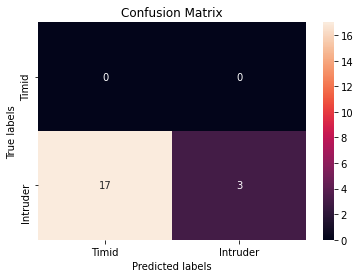

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix([True for i in testScores], predicted)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Timid', 'Intruder']); 
ax.yaxis.set_ticklabels(['Timid', 'Intruder']);

In [55]:
path="Data/Experiment 3/Detected"
fileL = os.listdir(path)

try:
    for index, file in enumerate(fileL):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.txt'])))
except:
    pass

In [56]:
files =[]
for i in range(len(fileL)):
    with open(path+'/'+str(i)+'.txt') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        files.append(file)

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'call', 'sti', 'call', 'jmp', 'mov', 'cmp', 'mov', 'cmp', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'i

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'call', 'call', 'sti', 'call', 'jmp', 'call', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'mov', 'cmp', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'cmp', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'call', 'call', 'pop', 'xor', '

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'call', 'call', 'sti', 'call', 'jmp', 'call', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'cmp', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'cmp', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'call', 'call', 'pop', 'xor', 'stosb',

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'call', 'ret', 'call', 'call', 'push', 'mov', 'int', 'mov', 'mov', 'cmp', 'mov', 'int', 'pop', 'or', 'jz', 'test', 'jnz', 'cmp', 'je', 'call', 'push', 'm

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'cmp', 'mov', 'mov', 'sti', 'call', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'int', 'mov', 'mov', 'mov', 'int', 'pop', 'or', 'jz', 'test', 'jnz', 'cmp', 'j

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cli', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'call', 'sti', 'call', 'jmp', 'call', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'mov', 'cmp', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'call', 'call', 'pop', 'xor', 'stosb', 'mov', 'cmp', 'mov', 'mov', 'mov', 'mul', 'add', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', '

In [57]:
testMsa2 = [i for i in files]
for i in range(len(testMsa2)):
    for j in range(len(testMsa2[i])):
            testMsa2[i][j]=opD[testMsa2[i][j]]
testMsa2[0]

['A',
 'A',
 'A',
 'A',
 'C',
 'A',
 'A',
 'C',
 'D',
 'E',
 'A',
 'A',
 'A',
 'A',
 'F',
 'G',
 'F',
 'F',
 'F',
 'G',
 'F',
 'F',
 'F',
 'H',
 'A',
 'I',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'F',
 'J',
 'F',
 'K',
 'A',
 'B',
 'A',
 'B',
 'A',
 'L',
 'A',
 'C',
 'B',
 'G',
 'L',
 'A',
 'A',
 'F',
 'M',
 'L',
 'A',
 'N',
 'A',
 'F',
 'O',
 'F',
 'P',
 'B',
 'M',
 'Q',
 'A',
 'A',
 'F',
 'N',
 'E',
 'F',
 'G',
 'H',
 'L',
 'R',
 'A',
 'A',
 'A',
 'A',
 'S',
 'T',
 'A',
 'F',
 'E',
 'F',
 'M',
 'F',
 'M',
 'N',
 'H',
 'L',
 'R',
 'U',
 'O',
 'F',
 'O',
 'A',
 'A',
 'C',
 'A',
 'A',
 'F',
 'E',
 'A',
 'A',
 'A',
 'C',
 'U',
 'G',
 'H',
 'N',
 'R',
 'A',
 'A',
 'F',
 'Q',
 'E',
 'F',
 'P',
 'A',
 'C',
 'K',
 'H',
 'A',
 'V',
 'O',
 'H',
 'O',
 'F',
 'E',
 'A',
 'C',
 'A',
 'A',
 'A',
 'C',
 'H',
 'U',
 'G',
 'W',
 'M',
 'B',
 'X',
 'F',
 'E',
 'A',
 'C',
 'A',
 'C',
 'K',
 'L',
 'O',
 'A',
 'A',
 'S',
 'T',
 'O',
 'A',
 'N'

In [58]:
testScores2=[]
for i in range(10):
    dp={}
    t=testMsa2[i]
    score = prob('E',len(t))
    print(score)
    testScores2.append(score)

7.583073420949943e-12
7.583073420949943e-12
1.2669428227710065e-11
1.26694282277015e-11
1.0750470302352671e-12
1.0750470302352671e-12
1.0750470302352661e-12
1.26694282277015e-11
1.26694282277015e-11
1.26694282277015e-11


In [59]:
for i in range(10,len(testMsa2)):
    dp={}
    t=testMsa2[i]
    score = prob('E',len(t))
    print(score)
    testScores2.append(score)

1.2669428227710065e-11
1.2669428227701462e-11
2.2909396991731802e-12
7.583073420949943e-12
1.26694282277015e-11
1.0750470302352671e-12
1.26694282277015e-11
1.26694282277015e-11
1.0734640832034467e-12
7.583073420949943e-12


In [68]:
predicted = [i>min(trainScores) for i in testScores2]
predicted

[True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True]

In [69]:
accuracy = sum([1 for i in testScores2 if i>min(trainScores)])
accuracy*100/len(testScores2)

70.0

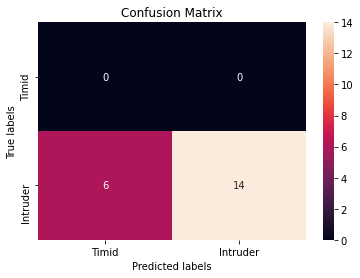

In [63]:
cm = confusion_matrix([True for i in testScores2], predicted)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Timid', 'Intruder']); 
ax.yaxis.set_ticklabels(['Timid', 'Intruder']);

In [64]:
test=testScores+testScores2

In [65]:
predicted = [i>min(trainScores) for i in test]
predicted

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True]

In [66]:
accuracy = sum([1 for i in test if i>min(trainScores)])
accuracy*100/len(test)

42.5

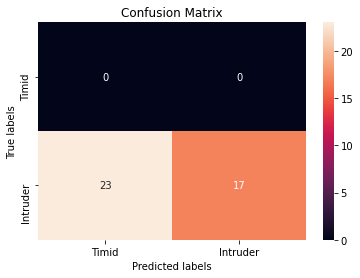

In [67]:
cm = confusion_matrix([True for i in test], predicted)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Timid', 'Intruder']); 
ax.yaxis.set_ticklabels(['Timid', 'Intruder']);